# Part II - Prosper Loan Explanatory Data Analysis

## by Elliot Manuel Sithole

29/09/2022

## Investigation Overview

> The goal of ther project was to invesigate  on loan status and borrower-APR features, loooking at how they interact with each other and other categorical and numerical variables in the data set in order to get insights on  relationships and trends. This will help to review key factors that affects loan status outcomes, and also explain important determinants for borrower's APR. 

## Dataset Overview

> Prosper Marketplace, Inc. is a San Francisco, California-based company involved in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money.The Propser loan [data set](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000) contains 113,937 loan entries with 81 variables on each loan, including loan amount, borrower rate, current loan status, borrower income, and many others. This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) elaborates on the features contained in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load data and inspect
df_loan= pd.read_csv('prosperLoanData.csv')



In [3]:
# Make copies of original pieces of data
df_og= df_loan.copy()

In [4]:
# trim and select these features for further analysis
df = df_og[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome','MonthlyLoanPayment',
       'IncomeVerifiable','IsBorrowerHomeowner']]

In [5]:
#clean column names
# first-pip install skimpy
from skimpy import clean_columns
df1 = clean_columns(df)

In [6]:
# remove duplicates and confirm removal.
df_new= df1.drop_duplicates()
df_new.duplicated().value_counts()

False    113066
dtype: int64

In [7]:
# replace null values in employment status column with Not Available
# replace null values in occupation column with Not Provided
df_new['employment_status'].fillna("Not available",inplace=True)
df_new['occupation'].fillna("Not_provided",inplace=True)

In [8]:
# drop null values in all other columns and confirm removal
df_clean=df_new.dropna()

In [9]:
# determine the credit score avarage from lower and upper scores.
df_clean['credit_score_avg'] = df_clean[['credit_score_range_lower','credit_score_range_upper']
                                       ].mean(axis=1)

In [10]:
#group using credit lower score cut-offs
def credit_score(c):
    outcome=""
    if c <= 660 :
        outcome = "Poor"
    if c>=660:
        outcome = "Fair"
    if c>=680:
        outcome = "Good"
    if c>=720:
        outcome = "Excellent"
    return outcome
df_clean['credit_score'] = df_clean['credit_score_avg'].apply(credit_score)

In [11]:
# drop unnecessary columns
cols = ['credit_score_range_lower','credit_score_range_upper']
df_clean.drop(columns=cols , axis=1 , inplace=True)


In [12]:
# categorize credit score astype() ordinal variable
order = ['Excellent','Good','Fair','Poor']
order_class = pd.api.types.CategoricalDtype(ordered=True ,categories= order)
df_clean['credit_score'] = df_clean['credit_score'].astype(order_class)

>**Distribution of borrower's APR**

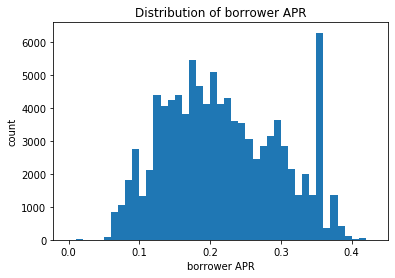

In [13]:
# Plotting histogram.
bins = np.arange(0,df_clean['borrower_apr'].max()+0.01, 0.01) 
plt.hist(x='borrower_apr', data= df_clean,bins=bins)
plt.title('Distribution of borrower APR')
plt.xlabel('borrower APR')
plt.ylabel('count');

>Approximately, 0.2 is the average borower's annual percentage rate but however, the distribution is bimodal with peak counts way higher than the average between 0.28 and 0.38. This is more evident on decreasing the bin size to 0.001.

>**Distribution of the loan status by frequency**

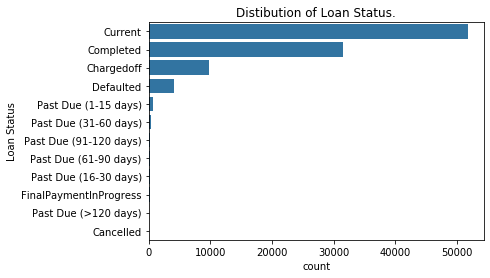

In [14]:
# visualise the loan status distribution
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, y= 'loan_status', color=base_color, order= df_clean['loan_status'].value_counts().index)
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Status.');

>Most loan status were current and then followed by the completed ones.

In [15]:
num_variables= ['term','borrower_apr','borrower_rate', 'loan_original_amount',
                'debt_to_income_ratio', 'stated_monthly_income', 'monthly_loan_payment','credit_score_avg']

In [16]:
# reset index
df_clean.reset_index(inplace=True)

In [17]:
df_clean.drop('index',axis=1,inplace=True)

>**Correlation matrix for numerical features.**

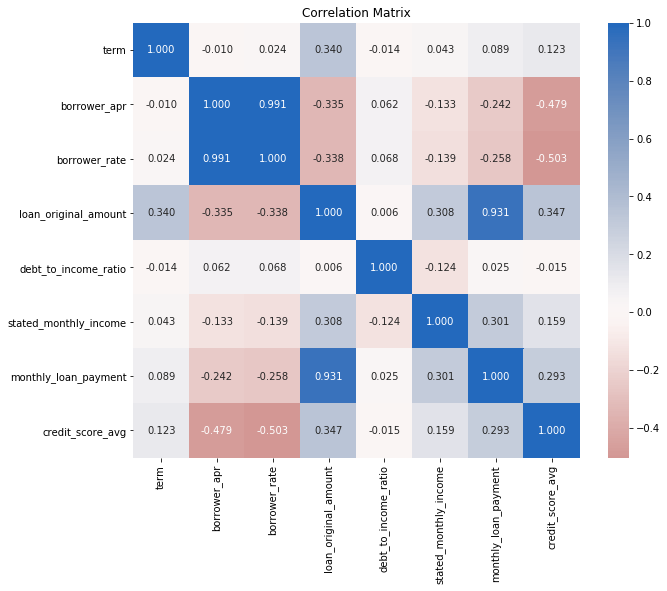

In [18]:
# Create a correlation matrix for numeric variables
plt.figure(figsize = [10, 8])
sb.heatmap(df_clean[num_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix'); 

>From the hitmap and Pairgrid visuals, of significance include:
A positive correlation between Borrower APR and Borrower Rate, financially, a very logical association. A similar positive correlation outcome is observed with original loan amount and monthly loan payment.

> Albeit not strong there is a negative correlation between both borrower-APR and borrower rate to credit score average.

>**Credit score vs borrower APR** 

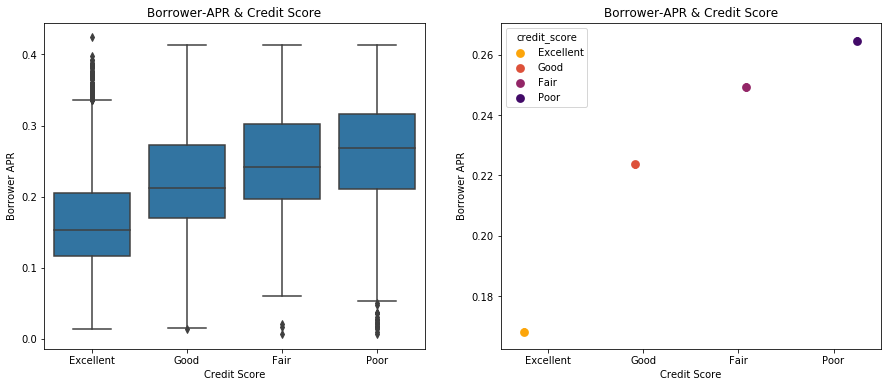

In [19]:
# plot Borrower APR vs Credit Score
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
sb.boxplot(data=df_clean,y='borrower_apr',x='credit_score',color=base_color);
plt.title('Borrower-APR & Credit Score')
plt.ylabel('Borrower APR')
plt.xlabel('Credit Score');

plt.subplot(1, 2, 2)
sb.pointplot(data=df_clean,y='borrower_apr',x='credit_score',color=base_color,
            hue = 'credit_score', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r');
plt.title('Borrower-APR & Credit Score')
plt.ylabel('Borrower APR')
plt.xlabel('Credit Score');

> The trend shows the borrower-APR is lower with excellent credit scores,with the pattern consistently inversely related across.

>**Home-owner or credit score vs loan status.**

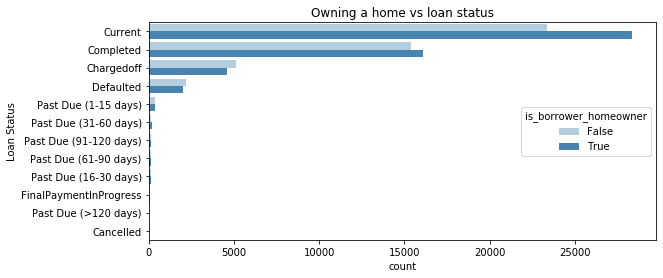

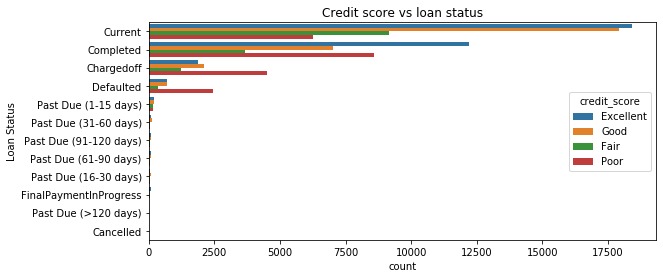

In [20]:
#plot loan status vs is_borrower_homeowner
plt.figure(figsize = [20, 4]) 
plt.subplot(1, 2, 1)
sb.countplot(data = df_clean, y = 'loan_status', hue = 'is_borrower_homeowner', palette = 'Blues', 
             order= df_clean['loan_status'].value_counts().index)
plt.title('Owning a home vs loan status')
plt.xlabel('count')
plt.ylabel('Loan Status');

plt.figure(figsize = [20, 4]) 
plt.subplot(1, 2, 2)
sb.countplot(data = df_clean, y = 'loan_status', hue = 'credit_score', 
             order= df_clean['loan_status'].value_counts().index)
plt.title('Credit score vs loan status')
plt.xlabel('count')
plt.ylabel('Loan Status');

> Owning a home seems had a bearing on loan status, with the majority having current and completed loans, and this trend is slightly the opposite with those defaulted and charged-off.

> Most borrowers with excellent credit scores had current or completed loans, were as expected borrowers with defaulted and charged-off had poor credit scores more often.

In [21]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)
   

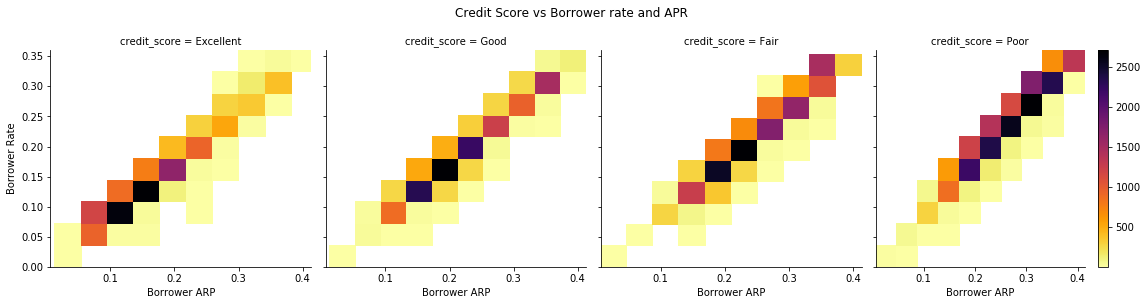

In [22]:
# create faceted heat maps on levels of the credit score variable
g = sb.FacetGrid(data = df_clean, col = 'credit_score', col_wrap = 4, height = 4)
g.map(hist2dgrid, 'borrower_apr', 'borrower_rate', color = 'inferno_r')
g.set_xlabels('Borrower ARP')
g.set_ylabels('Borrower Rate')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Credit Score vs Borrower rate and APR', y=1.05, fontsize=12)
plt.colorbar()


>The trend shows the borrower rate and APR are concentarated at the lower end with increasing credit scores. Borrow rate and APR are roughly below 0.2 and 0.3 respectevely for excellent and good credit scores. And these are concentrated higher up in fair and poor credit score groups.

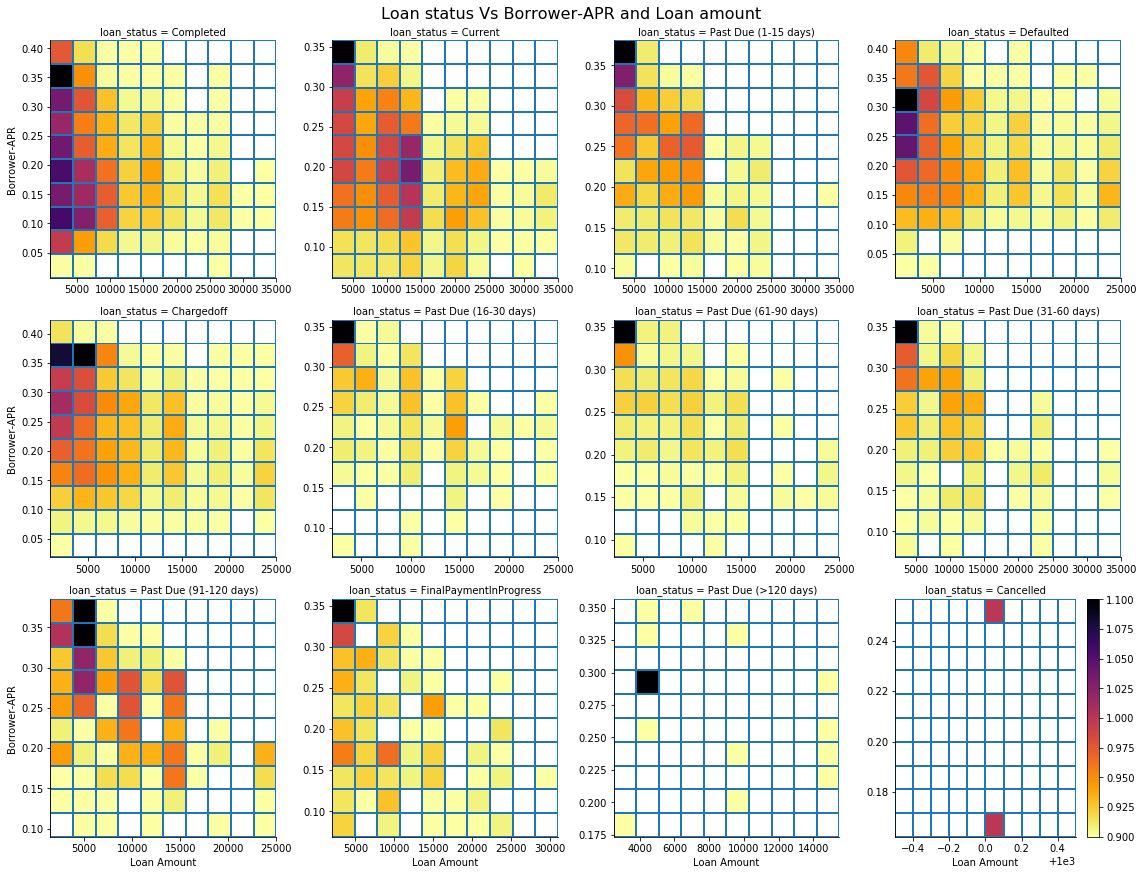

In [23]:
g = sb.FacetGrid(data = df_clean, col = 'loan_status', col_wrap = 4, height = 4,
                 sharex=False,sharey=False)
g.map(plt.hist2d, 'loan_original_amount', 'borrower_apr',cmap = 'inferno_r',cmin=0.5)
g.set_xlabels('Loan Amount')
g.set_ylabels('Borrower-APR')
g.fig.suptitle('Loan status Vs Borrower-APR and Loan amount',y=1.01, fontsize=16)
plt.colorbar()


> There is no clear picture of any association between loan amounts, borrower ARP and loan status. But however, the majority of points are concentrated at the ARP of 0.35 and amounts close to or less than 5000. No clear systematic interaction of the 3 features observed.